概要：上节学习了矩阵运算的部分几何意义；本节讨论矩阵的逆。

1.矩阵乘法 - 旋转。

当做矩阵的点积运算时，如果第一个矩阵是一维的，那么结果是在一维矩阵上的投影；我们看看第一个矩阵是二维的情况：

In [16]:
from __future__ import division, print_function, unicode_literals

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

def plot_vector2d(vector2d, origin=[0, 0], **options):
    return plt.arrow(origin[0], origin[1], vector2d[0], vector2d[1],
              head_width=0.2, head_length=0.3, length_includes_head=True,
              **options)

def plot_transformation(P_before, P_after, text_before, text_after, axis = [0, 5, 0, 4], arrows=False):
    if arrows:
        for vector_before, vector_after in zip(P_before.T, P_after.T):
            plot_vector2d(vector_before, color="blue", linestyle="--")
            plot_vector2d(vector_after, color="red", linestyle="-")
    plt.gca().add_artist(Polygon(P_before.T, alpha=0.2))
    plt.gca().add_artist(Polygon(P_after.T, alpha=0.3, color="r"))
    plt.text(P_before[0].mean(), P_before[1].mean(), text_before, fontsize=18, color="blue")
    plt.text(P_after[0].mean(), P_after[1].mean(), text_after, fontsize=18, color="red")
    plt.axis(axis)
    plt.grid()
    
P = np.array([
        [3.0, 4.0, 1.0, 4.6],
        [0.2, 3.5, 2.0, 0.5]
    ])

我们创建一个夹角为30度和120度的二维矩阵：

In [17]:
angle30 = 30 * np.pi / 180
angle120 = 120 * np.pi / 180
V = np.array([
        [np.cos(angle30), np.sin(angle30)],
        [np.cos(angle120), np.sin(angle120)]
    ])
V

array([[ 0.8660254,  0.5      ],
       [-0.5      ,  0.8660254]])

我们看看V和P的点积：

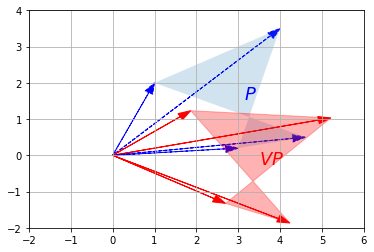

In [18]:
P_rotated = V.dot(P)
plot_transformation(P, P_rotated, "$P$", "$VP$", [-2, 6, -2, 4], arrows=True)
plt.show()

我们看到，结果矩阵沿着夹角为30度的斜线旋转了30度。

矩阵V也叫做旋转矩阵。

2.矩阵乘法 - 其它的一些线性转换。

下面我们看看剪切效果（shear mapping）:

In [26]:
P

array([[3. , 4. , 1. , 4.6],
       [0.2, 3.5, 2. , 0.5]])

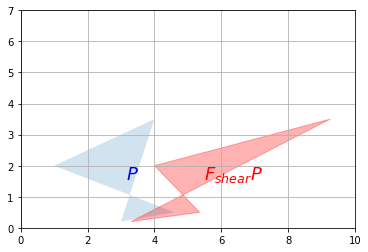

In [27]:
F_shear = np.array([
        [1, 1.5],
        [0, 1]
    ])
plot_transformation(P, F_shear.dot(P), "$P$", "$F_{shear} P$",
                    axis=[0, 10, 0, 7])
plt.show()

In [28]:
F_shear.dot(P)

array([[3.3 , 9.25, 4.  , 5.35],
       [0.2 , 3.5 , 2.  , 0.5 ]])

我们看到，原来的P图形横坐标都发生了放大效果，但纵坐标都没变。

也可以让P在纵坐标上发生改变，而横坐标不变：

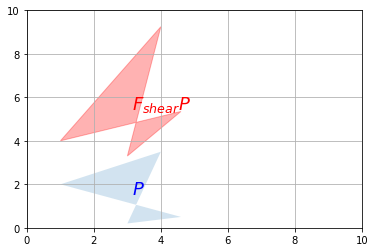

In [31]:
F_shear = np.array([
        [1, 0],
        [1, 1.5]
    ])
plot_transformation(P, F_shear.dot(P), "$P$", "$F_{shear} P$",
                    axis=[0, 10, 0, 10])
plt.show()

下面我们看看对单位方矩阵（unit square）的影响：

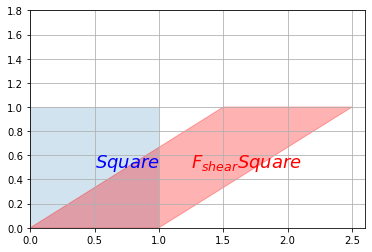

In [33]:
F_shear = np.array([
        [1, 1.5],
        [0, 1]
    ])

Square = np.array([
        [0, 0, 1, 1],
        [0, 1, 1, 0]
    ])
plot_transformation(Square, F_shear.dot(Square), "$Square$", "$F_{shear} Square$",
                    axis=[0, 2.6, 0, 1.8])
plt.show()

接下来看看挤压映射（squeeze mapping）：

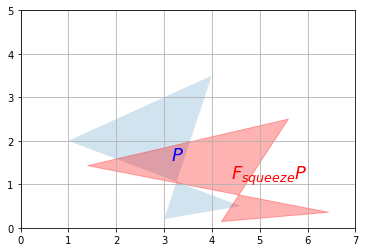

In [34]:
F_squeeze = np.array([
        [1.4, 0],
        [0, 1/1.4]
    ])
plot_transformation(P, F_squeeze.dot(P), "$P$", "$F_{squeeze} P$",
                    axis=[0, 7, 0, 5])
plt.show()

我们看到，结果矩阵的横坐标都增加了0.4倍，纵坐标都减少了1/1.4倍。

在单位矩阵上（unit square）的效果：

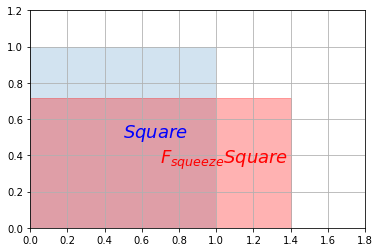

In [35]:
plot_transformation(Square, F_squeeze.dot(Square), "$Square$", "$F_{squeeze} Square$",
                    axis=[0, 1.8, 0, 1.2])
plt.show()

最后看看再横坐标轴上的效果：

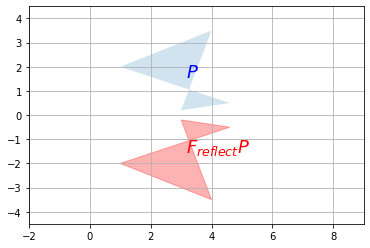

In [36]:
F_reflect = np.array([
        [1, 0],
        [0, -1]
    ])
plot_transformation(P, F_reflect.dot(P), "$P$", "$F_{reflect} P$",
                    axis=[-2, 9, -4.5, 4.5])
plt.show()

结果矩阵的X轴坐标不变，但纵坐标都变成了负值。

3.矩阵的逆。

矩阵能够执行上述线性变换，如果变换后再变换回原来的矩阵，那么这个矩阵就是可逆的，记做$F^{-1}$。

例如下面的例子：

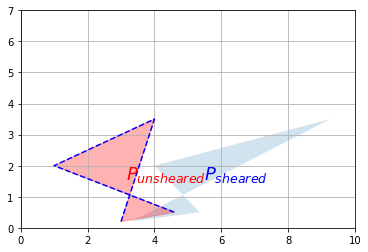

In [37]:
F_inv_shear = np.array([
    [1, -1.5],
    [0, 1]
])
P_sheared = F_shear.dot(P)
P_unsheared = F_inv_shear.dot(P_sheared)
plot_transformation(P_sheared, P_unsheared, "$P_{sheared}$", "$P_{unsheared}$",
                    axis=[0, 10, 0, 7])
plt.plot(P[0], P[1], "b--")
plt.show()

变换后的矩阵经过点积运算后，又变回了原来的矩阵。

numpy可以计算矩阵的逆：

In [38]:
F_inv_shear = np.linalg.inv(F_shear)
F_inv_shear

array([[ 1. , -1.5],
       [ 0. ,  1. ]])

只有方形矩阵才是可逆的，但不是所有的方形矩阵都可逆：

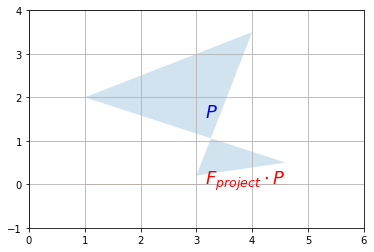

In [40]:
F_project = np.array([
        [1, 0],
        [0, 0]
    ])
plot_transformation(P, F_project.dot(P), "$P$", "$F_{project} \cdot P$",
                    axis=[0, 6, -1, 4])
plt.show()

In [41]:
F_project.dot(P)

array([[3. , 4. , 1. , 4.6],
       [0. , 0. , 0. , 0. ]])

我们看到，点积运算后的矩阵信息丢失严重；可以用inv计算矩阵是否可逆：

In [42]:
try:
    np.linalg.inv(F_project)
except np.linalg.LinAlgError as e:
    print("LinAlgError:", e)

LinAlgError: Singular matrix


不可逆的矩阵叫单一矩阵（Singular matrix）。

矩阵点积它的逆矩阵是一个同一性矩阵：

$M \cdot M^{-1} = M^{-1} \cdot M = I$

如：

In [44]:
F_shear.dot(np.linalg.inv(F_shear))

array([[1., 0.],
       [0., 1.]])

以下公式成立：

$ (\lambda \times M)^{-1} = \frac{1}{\lambda} \times M^{-1}$

这个公式我暂时还没理解。

一个矩阵和它的逆矩阵相等，我们叫做involution，例如：

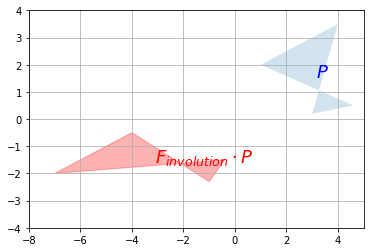

In [45]:
F_involution  = np.array([
        [0, -2],
        [-1/2, 0]
    ])
plot_transformation(P, F_involution.dot(P), "$P$", "$F_{involution} \cdot P$",
                    axis=[-8, 5, -4, 4])
plt.show()

In [46]:
np.linalg.inv(F_involution)

array([[-0. , -2. ],
       [-0.5, -0. ]])

In [47]:
F_involution.dot(F_involution.dot(P))

array([[3. , 4. , 1. , 4.6],
       [0.2, 3.5, 2. , 0.5]])

In [48]:
P

array([[3. , 4. , 1. , 4.6],
       [0.2, 3.5, 2. , 0.5]])

In [ ]:
这证明F_involution是可逆矩阵。